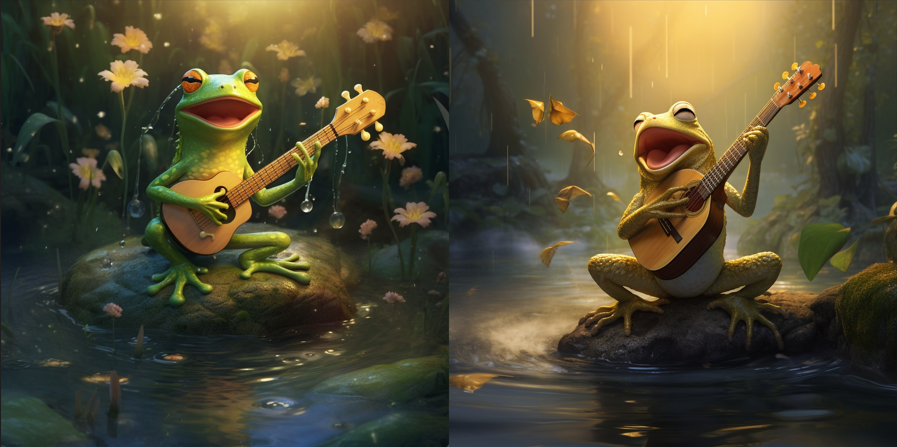
<center> <font color="gray"> Изображение сгенерировано Midjourney по запросу "лягушка поющая серенаду" </font> </center>
 


# <center> Классификация лягушек по песням

Мы будем работать с [данными](https://lms-cdn.skillfactory.ru/assets/courseware/v1/a21a8975fee2a747c0a0f335a4a9e0f4/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/Frogs_MFCCs.zip), которые содержат информацию о звуках, издаваемых лягушками, и характеристики этих звуков.

Мы буквально займемся классификацией лягушек по видам в зависимости от особенностей их кваканья. Будем решать задачу мультиклассовой классификации.

В качестве признаков, которые мы будем использовать для предсказания, возьмем все, кроме:

- `Family` — семейство лягушек;
- `Genus` — род лягушек;
- `Species` — вид лягушек (целевой признак);
- `RecordID` — ID записи.

Все остальные признаки относятся к акустическим особенностям кваканья — они-то нам и понадобятся, чтобы определить, к какому семейству относится лягушка.

In [1]:
# Для работы с данными
import pandas as pd
import numpy as np

# Для моделирования
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import metrics

# Для графики и отображения
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-v0_8')

# Скрываем предупреждения
import warnings
warnings.filterwarnings('ignore')

## Знакомство с данными

Загрузим датасет.

In [2]:
# frogs sounds data frame
fsdf = pd.read_csv('data/Frogs_MFCCs.zip')
fsdf.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


### Таксономическое древо

Попробуем построить таксономическое древо на размеченной части данных, которую мы не будем использовать далее при создании классифицирующей модели.

In [3]:
# Выделим часть с именами
txnmc_data = fsdf[['Family', 'Genus', 'Species']]
# "Разделение" — формально: для функционирования алгоритма
X_txnmc = txnmc_data
y_txnmc = txnmc_data['Species']
# Кодирование данных
cols = ['Family', 'Genus', 'Species']
one_hot_encoder = OneHotEncoder(sparse_output=False)
data_onehot = one_hot_encoder.fit_transform(X_txnmc[cols])
column_names = one_hot_encoder.get_feature_names_out(cols)
X_txnmc_onehot = pd.DataFrame(data_onehot, columns=column_names)
# Инициализация алгоритма дерева
dt_h = DecisionTreeClassifier(criterion='entropy')
dt_h.fit(X_txnmc_onehot, y_txnmc)
preds_dt_h = dt_h.predict(X_txnmc_onehot)
# Сводка метрик
print(metrics.classification_report(y_txnmc, preds_dt_h))

                        precision    recall  f1-score   support

        AdenomeraAndre       1.00      1.00      1.00       672
AdenomeraHylaedactylus       1.00      1.00      1.00      3478
    Ameeregatrivittata       1.00      1.00      1.00       542
            HylaMinuta       1.00      1.00      1.00       310
  HypsiboasCinerascens       1.00      1.00      1.00       472
     HypsiboasCordobae       1.00      1.00      1.00      1121
   LeptodactylusFuscus       1.00      1.00      1.00       270
 OsteocephalusOophagus       1.00      1.00      1.00       114
     Rhinellagranulosa       1.00      1.00      1.00        68
           ScinaxRuber       1.00      1.00      1.00       148

              accuracy                           1.00      7195
             macro avg       1.00      1.00      1.00      7195
          weighted avg       1.00      1.00      1.00      7195



Здесь мы видим то, что и ожидали: дерево решений полностью описало наши данные, т.к. мы включили в обучение все имеющиеся признаки: семейство, род и вид лягушек.

Попробуем получить таксономическое дерево.

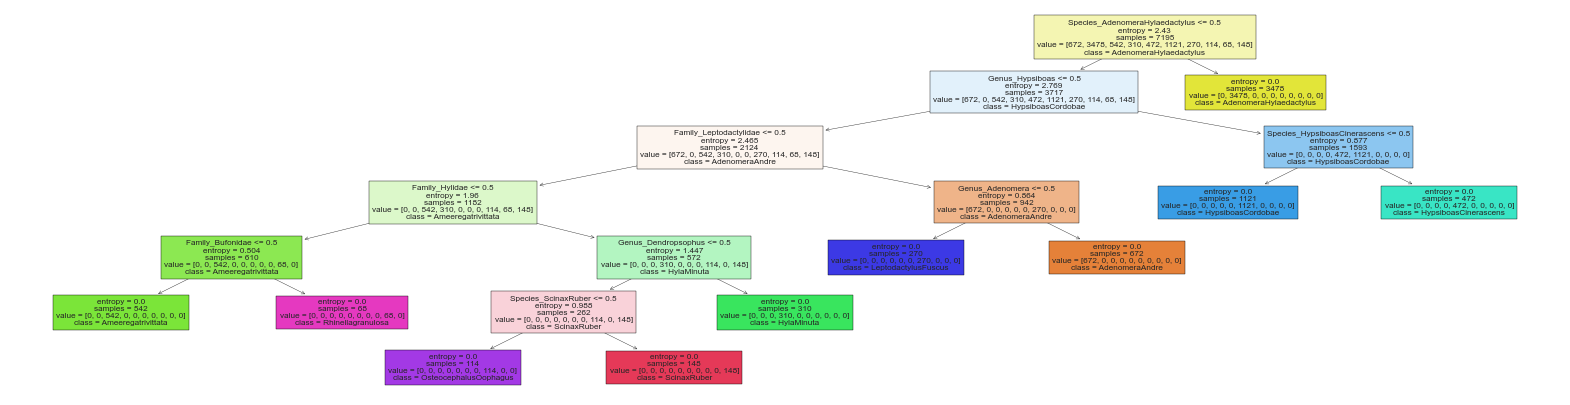

In [4]:
fig, axes = plt.subplots(figsize=(20, 5))
plot_tree(
    decision_tree=dt_h, #дерево решений 
    feature_names=column_names, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
    class_names=dt_h.classes_, #имена классов
    ax=axes
);

Получившееся дерево не является строго филогенетическим, т.к. использованный нами алгоритм дерева решений при разделении данных в принципе не руководствуется иерархией биологического родства, а также не поддерживает сплитование более чем на две подвыборки. Однако все это не мешает нам использовать даже такие скромные возможности для поверхностной демонстрации общего эволюционного принципа, обеспечивающего биоразнобразие на нашей планете.

Но строгую таксономию можно произвести и с помощью простых интсрументов библиотеки pandas.

In [5]:
fsdf.groupby('Family')[['Genus', 'Species']].value_counts().to_frame()

count
Family          Genus         Species                      
Bufonidae       Rhinella      Rhinellagranulosa          68
Dendrobatidae   Ameerega      Ameeregatrivittata        542
Hylidae         Hypsiboas     HypsiboasCordobae        1121
                              HypsiboasCinerascens      472
                Dendropsophus HylaMinuta                310
                Scinax        ScinaxRuber               148
                Osteocephalus OsteocephalusOophagus     114
Leptodactylidae Adenomera     AdenomeraHylaedactylus   3478
                              AdenomeraAndre            672
                Leptodactylus LeptodactylusFuscus       270

Семейство Bufonidae представлено лишь одним видом — аналогично Dendrobatidae.

### Подготовка данных

Факторизуем целевой признак.

In [6]:
factor = pd.factorize(fsdf['Species'])
fsdf.Species = factor[0]
definitions = factor[1]

Разделим матрицу признаков и вектор целевого признак.

In [7]:
X = fsdf.drop(['Family', 'Genus', 'Species', 'RecordID'], axis=1)
y = fsdf['Species']

Разделим выборку на обучающую и тестовую в соотношении 80/20.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
# Нормализуем данные
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(X_train)
Xtest_scaled = scaler.transform(X_test)

## Моделирование

### LogisticRegression

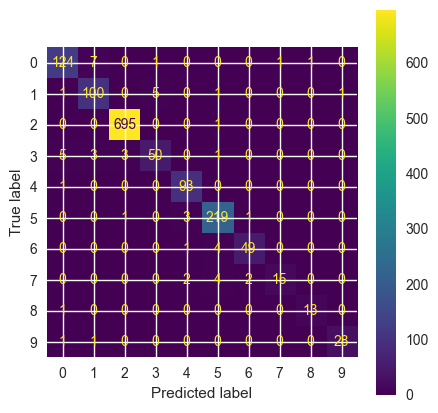

In [9]:
# Создаём объект класса LogisticRegression 
log_reg = LogisticRegression(
    multi_class='multinomial', # мультиклассовая классификация
    random_state=42 # генерация случайных чисел
)
# Обучаем модель
log_reg.fit(Xtrain_scaled, y_train)
# Делаем предсказание
preds_train_lr = log_reg.predict(Xtrain_scaled)
preds_test_lr = log_reg.predict(Xtest_scaled)

# Высчитаем матрицу ошибок
cm = metrics.confusion_matrix(y_test, preds_test_lr)
# Визуализируем
plt.rcParams['figure.figsize'] = (5,5)
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=log_reg.classes_
)
disp.plot();

In [10]:
# Создадим словарь имен в целевой переменной
reversefactor = dict(zip(range(10),definitions))
# Вернем исходные векторы целевой перменной
y_train_rvrsf = np.vectorize(reversefactor.get)(y_train)
y_test_rvrsf = np.vectorize(reversefactor.get)(y_test)
# Расшифруем предсказания
preds_train_lr_rvrsf = np.vectorize(reversefactor.get)(preds_train_lr)
preds_test_lr_rvrsf = np.vectorize(reversefactor.get)(preds_test_lr)

# Вывод метрик
print('Train metrics:')
print(metrics.classification_report(y_train_rvrsf, preds_train_lr_rvrsf))
print('-'*65)
print('Test metrics:')
print(metrics.classification_report(y_test_rvrsf, preds_test_lr_rvrsf))

Train metrics:
                        precision    recall  f1-score   support

        AdenomeraAndre       0.95      0.93      0.94       538
AdenomeraHylaedactylus       0.99      1.00      1.00      2782
    Ameeregatrivittata       0.92      0.95      0.94       434
            HylaMinuta       0.89      0.83      0.86       248
  HypsiboasCinerascens       0.97      0.98      0.98       378
     HypsiboasCordobae       0.98      0.99      0.98       897
   LeptodactylusFuscus       0.97      0.95      0.96       216
 OsteocephalusOophagus       0.89      0.84      0.86        91
     Rhinellagranulosa       0.89      0.91      0.90        54
           ScinaxRuber       0.98      0.99      0.99       118

              accuracy                           0.97      5756
             macro avg       0.94      0.94      0.94      5756
          weighted avg       0.97      0.97      0.97      5756

-----------------------------------------------------------------
Test metrics:
      

### RandomForestClassifier

In [11]:
# Инициализация
rfc = RandomForestClassifier(
    random_state=42
)
# Обучение
rfc.fit(Xtrain_scaled, y_train)
# Делаем предсказание
preds_train_rfc = rfc.predict(Xtrain_scaled)
preds_test_rfc = rfc.predict(Xtest_scaled)
# Расшифровка
preds_train_rfc_rvrsf = np.vectorize(reversefactor.get)(preds_train_rfc)
preds_test_rfc_rvrsf = np.vectorize(reversefactor.get)(preds_test_rfc)

# Вывод метрик
print('Train metrics:')
print(metrics.classification_report(y_train_rvrsf, preds_train_rfc_rvrsf))
print('-'*65)
print('Test metrics:')
print(metrics.classification_report(y_test_rvrsf, preds_test_rfc_rvrsf))

Train metrics:
                        precision    recall  f1-score   support

        AdenomeraAndre       1.00      1.00      1.00       538
AdenomeraHylaedactylus       1.00      1.00      1.00      2782
    Ameeregatrivittata       1.00      1.00      1.00       434
            HylaMinuta       1.00      1.00      1.00       248
  HypsiboasCinerascens       1.00      1.00      1.00       378
     HypsiboasCordobae       1.00      1.00      1.00       897
   LeptodactylusFuscus       1.00      1.00      1.00       216
 OsteocephalusOophagus       1.00      1.00      1.00        91
     Rhinellagranulosa       1.00      1.00      1.00        54
           ScinaxRuber       1.00      1.00      1.00       118

              accuracy                           1.00      5756
             macro avg       1.00      1.00      1.00      5756
          weighted avg       1.00      1.00      1.00      5756

-----------------------------------------------------------------
Test metrics:
      

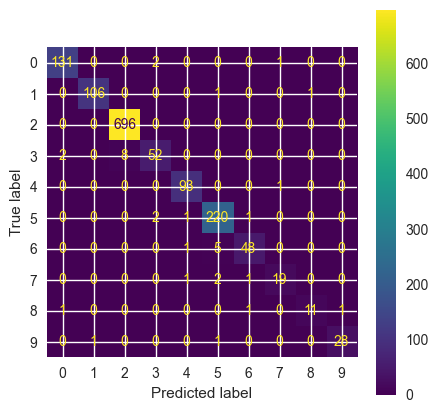

In [12]:
# Высчитаем матрицу ошибок
cm = metrics.confusion_matrix(y_test, preds_test_rfc)
# Визуализация
plt.rcParams['figure.figsize'] = (5,5)
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=rfc.classes_
)
disp.plot();

### StackingClassifier

Теперь попробуем улучшить качество нашего предсказания за счёт использования стекинга.

В качестве базовых моделей выберите следующие:

- случайный лес;
- KNN;
- наивный байесовский классификатор.

В качестве метамодели выберем логистическую регрессию.

In [13]:
%%time
# Список моделей для стэка
estimators = [
    ('rfc', RandomForestClassifier(random_state=42, n_jobs=-1)),
    ('knn', KNeighborsClassifier(n_jobs=-1)),
    ('gnb', GaussianNB() )               
]
# Инициализация
metamodel = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(
        multi_class='multinomial', # мультиклассовая классификация
        random_state=42 # генерация случайных чисел
    )
)
# Обучение
metamodel.fit(Xtrain_scaled, y_train)
# Предсказание
preds_train_stack = metamodel.predict(Xtrain_scaled)
preds_test_stack = metamodel.predict(Xtest_scaled)
# Расшифровка
preds_train_stack_rvrsf = np.vectorize(reversefactor.get)(preds_train_stack)
preds_test_stack_rvrsf = np.vectorize(reversefactor.get)(preds_test_stack)

# Вывод метрик
print('Train metrics:')
print(metrics.classification_report(y_train_rvrsf, preds_train_stack_rvrsf))
print('-'*65)
print('Test metrics:')
print(metrics.classification_report(y_test_rvrsf, preds_test_stack_rvrsf))

Train metrics:
                        precision    recall  f1-score   support

        AdenomeraAndre       1.00      1.00      1.00       538
AdenomeraHylaedactylus       1.00      1.00      1.00      2782
    Ameeregatrivittata       1.00      1.00      1.00       434
            HylaMinuta       1.00      0.99      1.00       248
  HypsiboasCinerascens       1.00      1.00      1.00       378
     HypsiboasCordobae       1.00      1.00      1.00       897
   LeptodactylusFuscus       1.00      1.00      1.00       216
 OsteocephalusOophagus       1.00      1.00      1.00        91
     Rhinellagranulosa       1.00      1.00      1.00        54
           ScinaxRuber       1.00      1.00      1.00       118

              accuracy                           1.00      5756
             macro avg       1.00      1.00      1.00      5756
          weighted avg       1.00      1.00      1.00      5756

-----------------------------------------------------------------
Test metrics:
      

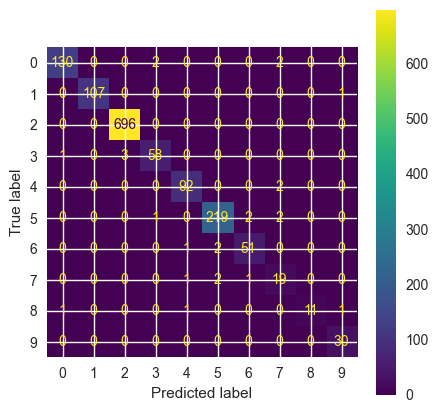

In [14]:
# Высчитаем матрицу ошибок
cm = metrics.confusion_matrix(y_test, preds_test_stack)
# Визуализация
plt.rcParams['figure.figsize'] = (5,5)
disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=metamodel.classes_
)
disp.plot();

## Итог

Сведем метрики моделей в соответствующие таблицы.

In [15]:
species_names = ['Adenomera Andre',
 'Ameerega trivittata',
 'Adenomera Hylaedactylus',
 'Hy laMinuta',
 'Hypsiboas Cinerascens',
 'Hypsiboas Cordobae',
 'Leptodactylus Fuscus',
 'Osteocephalus Oophagus',
 'Rhinella granulosa',
 'Scinax Ruber']

pd.DataFrame(
    index=['LogReg Precision', 'RFC Precision', 'Stacker Precision',
           '',
           'LogReg Recall', 'RFC Recall', 'Stacker Recall',
           '',
           'LogReg F1', 'RFC F1', 'Stacker F1'
    ],
    columns=species_names,
    data=[
        list(np.round(metrics.precision_score(y_test, preds_test_lr, average=None), 3)),
        list(np.round(metrics.precision_score(y_test, preds_test_rfc, average=None), 3)),
        list(np.round(metrics.precision_score(y_test, preds_test_stack, average=None), 3)),
        list(['' for _ in range(10)]),
        list(np.round(metrics.recall_score(y_test, preds_test_lr, average=None), 3)),
        list(np.round(metrics.recall_score(y_test, preds_test_rfc, average=None), 3)),
        list(np.round(metrics.recall_score(y_test, preds_test_stack, average=None), 3)),
        list(['' for _ in range(10)]),
        list(np.round(metrics.f1_score(y_test, preds_test_lr, average=None), 3)),
        list(np.round(metrics.f1_score(y_test, preds_test_rfc, average=None), 3)),
        list(np.round(metrics.f1_score(y_test, preds_test_stack, average=None), 3))
    ]
)

,Adenomera Andre,Ameerega trivittata,Adenomera Hylaedactylus,Hy laMinuta,Hypsiboas Cinerascens,Hypsiboas Cordobae,Leptodactylus Fuscus,Osteocephalus Oophagus,Rhinella granulosa,Scinax Ruber
LogReg Precision,0.932,0.901,0.994,0.893,0.939,0.952,0.942,0.938,0.929,0.966
RFC Precision,0.978,0.991,0.989,0.929,0.969,0.961,0.941,0.905,0.917,0.966
Stacker Precision,0.985,1.0,0.996,0.951,0.968,0.982,0.944,0.76,1.0,0.938
,,,,,,,,,,
LogReg Recall,0.925,0.926,0.999,0.806,0.989,0.978,0.907,0.652,0.929,0.933
RFC Recall,0.978,0.981,1.0,0.839,0.989,0.982,0.889,0.826,0.786,0.933
Stacker Recall,0.97,0.991,1.0,0.935,0.979,0.978,0.944,0.826,0.786,1.0
,,,,,,,,,,
LogReg F1,0.929,0.913,0.996,0.847,0.964,0.965,0.925,0.769,0.929,0.949
RFC F1,0.978,0.986,0.994,0.881,0.979,0.971,0.914,0.864,0.846,0.949


In [16]:
pd.DataFrame(
    index=['Accuracy'],
    columns=['LogisticRegression', 'RandomForestClassifier', 'StackingClassifier'],
    data=[
        [round(metrics.accuracy_score(y_test, preds_test_lr), 3),
        round(metrics.accuracy_score(y_test, preds_test_rfc), 3),
        round(metrics.accuracy_score(y_test, preds_test_stack), 3)]
    ]
)


,LogisticRegression,RandomForestClassifier,StackingClassifier
Accuracy,0.963,0.976,0.982


Таким образом, воспользовавшись сравнительно несложным алгоритмом нам удалось создать весьма неплохую модель для классификации лягушек по аккустическим параметрам распеваемых ими песен.